#  ANSWER

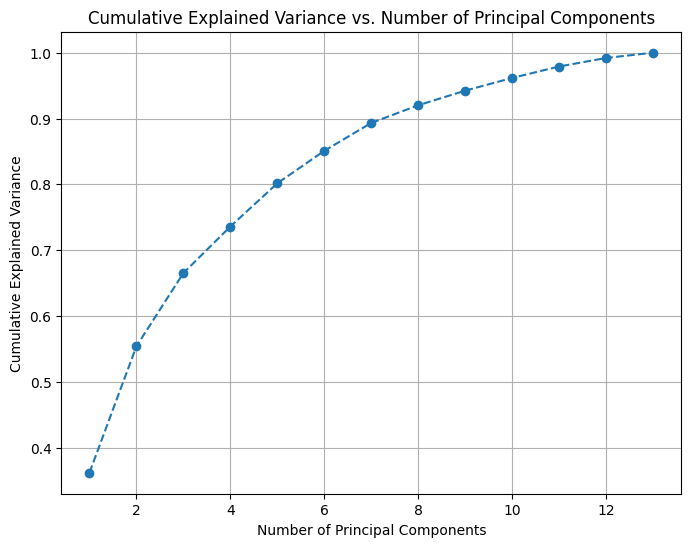

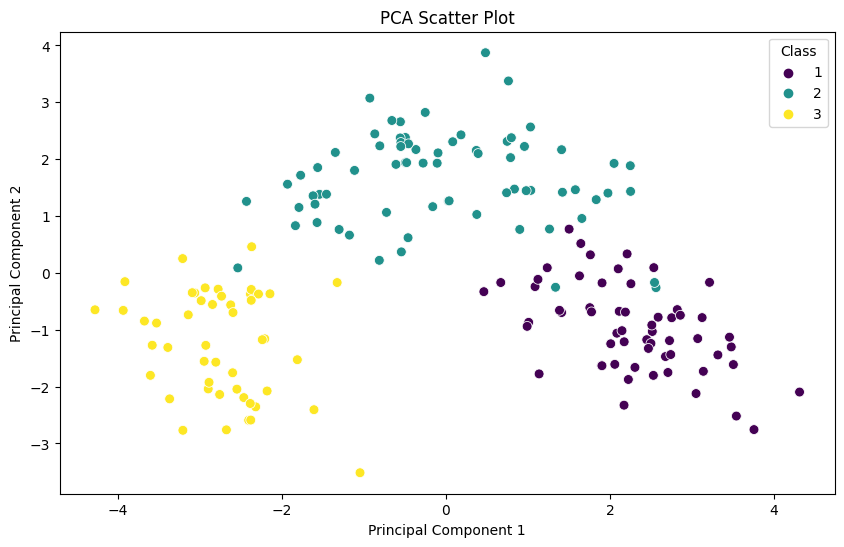

Silhouette Score for clustering: 0.5610505693103248

PCA and Clustering Analysis Report:
- Optimal Number of Principal Components: 2
- Number of Clusters (K-Means): 3
- Silhouette Score for Clustering: 0.5610505693103248



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [6]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Step 2: Download and load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
column_names = ["Class", "Alcohol", "Malic Acid", "Ash", "Alcalinity of Ash", "Magnesium",
                "Total Phenols", "Flavanoids", "Nonflavanoid Phenols", "Proanthocyanins",
                "Color Intensity", "Hue", "OD280/OD315 of diluted wines", "Proline"]
wine_df = pd.read_csv(url, names=column_names)

# Step 3: Split into features and target
X = wine_df.drop("Class", axis=1)
y = wine_df["Class"]

# Step 4: Data preprocessing
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 5: Implement PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Step 6: Determine the optimal number of components
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Plot explained variance ratio
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Principal Components')
plt.grid()
plt.show()

# Step 7: Choose the number of components and reapply PCA
n_components = 2  # Choose an appropriate number
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

# Step 8: Visualize PCA results
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='viridis', s=50)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Scatter Plot')
plt.legend(title='Class', loc='best')
plt.show()

# Step 9: Perform clustering (K-Means)
n_clusters = 3  # Choose the number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
wine_clusters = kmeans.fit_predict(X_pca)

# Step 10: Evaluate clustering using Silhouette Score
silhouette_avg = silhouette_score(X_pca, wine_clusters)

# Step 11: Interpret results
print(f'Silhouette Score for clustering: {silhouette_avg}')

# Step 12: Create a report
report = f'''
PCA and Clustering Analysis Report:
- Optimal Number of Principal Components: {n_components}
- Number of Clusters (K-Means): {n_clusters}
- Silhouette Score for Clustering: {silhouette_avg}
'''

# Print the report
print(report)
